<a href="https://colab.research.google.com/github/MoneyGeng/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
url = "https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv"
local_path = "charity_data.csv"
pd.read_csv(url).to_csv(local_path, index=False)

# Read the CSV file using the local file path
application_df = pd.read_csv(local_path)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
print(application_df['APPLICATION_TYPE'].value_counts())

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
print(application_df['CLASSIFICATION'].value_counts())

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
print(application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() > 1])

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 1000
classifications_to_replace = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() < cutoff_value].index.tolist()


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_df = pd.get_dummies(application_df)
numeric_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
X = numeric_df.drop(["IS_SUCCESSFUL"],axis=1)
y = numeric_df["IS_SUCCESSFUL"]


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_layer1_nodes = 9
hidden_layer2_nodes = 18

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer1_nodes, activation="relu", input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer2_nodes, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 396       
                                                                 
 dense_1 (Dense)             (None, 18)                180       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 595
Trainable params: 595
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5880 - accuracy: 0.7107
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5599 - accuracy: 0.7263
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5561 - accuracy: 0.7287
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5541 - accuracy: 0.7301
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5528 - accuracy: 0.7303
Epoch 6/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5516 - accuracy: 0.7295
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5511 - accuracy: 0.7303
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5505 - accuracy: 0.7307
Epoch 9/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5497 - accuracy: 0.7325
Epoch 10/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5492 - accura

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5520 - accuracy: 0.7265 - 507ms/epoch - 2ms/step
Loss: 0.551979660987854, Accuracy: 0.7265306115150452


<Axes: >

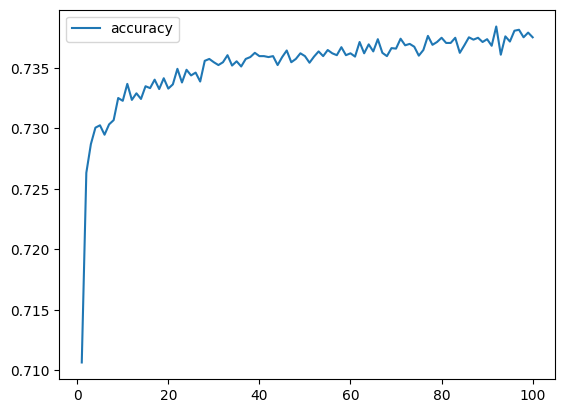

In [16]:
# Export our model to HDF5 file
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss']) + 1))
history_df.plot(y = 'accuracy')

In [17]:
nn.save('Models/AlphabetSoupCharity1.h5')

Model 2

In [18]:
# Define second model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_layer1_nodes = 12
hidden_layer2_nodes = 24
hidden_layer3_nodes = 1

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_layer1_nodes, activation="relu", input_dim=input_features))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_layer2_nodes, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=hidden_layer3_nodes, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                528       
                                                                 
 dense_4 (Dense)             (None, 24)                312       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [19]:
nn2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
fit_model2 = nn2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5983 - accuracy: 0.7039
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5617 - accuracy: 0.7272
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5557 - accuracy: 0.7310
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5533 - accuracy: 0.7311
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5519 - accuracy: 0.7313
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5505 - accuracy: 0.7318
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7320
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.7324
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5491 - accuracy: 0.7323
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5487 - accura

In [21]:
model_loss2, model_accuracy2 = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss2}, Accuracy: {model_accuracy2}")

268/268 - 1s - loss: 0.5514 - accuracy: 0.7276 - 678ms/epoch - 3ms/step
Loss: 0.551352858543396, Accuracy: 0.727580189704895


<Axes: >

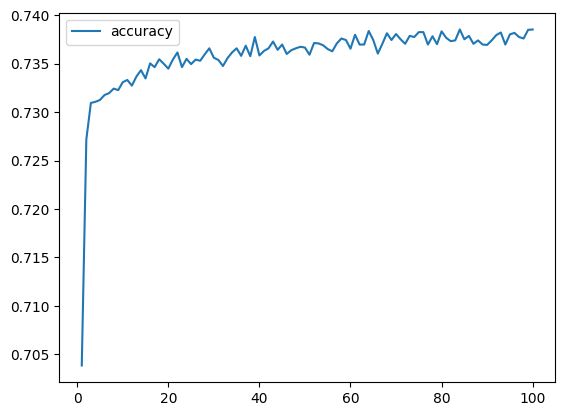

In [22]:
# Export our model to HDF5 file
history_df2 = pd.DataFrame(fit_model2.history, index = range(1, len(fit_model2.history['loss']) + 1))
history_df2.plot(y = 'accuracy')

In [23]:
nn2.save('Models/AlphabetSoupCharity2.h5')

In [24]:
# Define third model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_layer1_nodes = 9
hidden_layer2_nodes = 18
hidden_layer3_nodes = 1

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_layer1_nodes, activation="tanh", input_dim=input_features))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_layer2_nodes, activation="tanh"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=hidden_layer3_nodes, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 9)                 396       
                                                                 
 dense_7 (Dense)             (None, 18)                180       
                                                                 
 dense_8 (Dense)             (None, 1)                 19        
                                                                 
Total params: 595
Trainable params: 595
Non-trainable params: 0
_________________________________________________________________


In [25]:
nn3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
fit_model3 = nn3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5869 - accuracy: 0.7037
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5640 - accuracy: 0.7238
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5595 - accuracy: 0.7275
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5557 - accuracy: 0.7288
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.7297
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5527 - accuracy: 0.7305
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5518 - accuracy: 0.7305
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7327
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5501 - accuracy: 0.7326
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5499 - accura

In [27]:
model_loss3, model_accuracy3 = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss3}, Accuracy: {model_accuracy3}")

268/268 - 0s - loss: 0.5533 - accuracy: 0.7245 - 469ms/epoch - 2ms/step
Loss: 0.5533162355422974, Accuracy: 0.7245481014251709


In [28]:
nn2.save('Models/AlphabetSoupCharity3.h5')